# HSV Filtering

Previously I just hand waved past filtering down various contours, but in the real world you will have to do it. Below is an interactive way of seeing what impact filtering based on color has. However, we converted to the HSV color space, it allows simpler color filtering. 

The images in the drop down are actually screen grabs taken from footage shot on field by Team 900 from their StereoLabs Zed camera. It has a 110 degree field of view. 

-19.421875

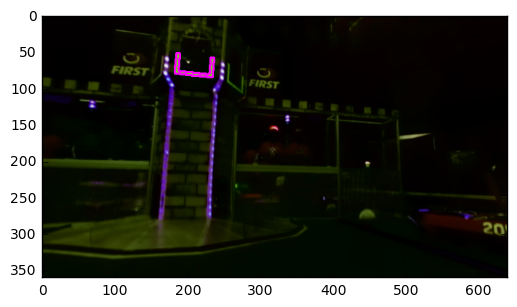

In [2]:
%matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import cv2
import matplotlib.pyplot as plt
import glob
import numpy as np


images = glob.glob('images/stereo_labs/*.png')

FOV = 110.0

def rateContours(r):
    return cv2.contourArea(r)

# Extracts the centroid from a contour, seriously, why isn't this built in?
def centroid(contour):
    M = cv2.moments(contour)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    return (cx, cy)

# Map pixels to degrees
def getAngle(centroid, FOV, WIDTH):
    slope = float(FOV)/WIDTH
    intercept = -FOV/2.0
    angle = (centroid[0]*slope)+intercept
    return angle

def thresh(imagePath ,h_min=60, h_max=90):
    image = cv2.imread(imagePath)
    hsv_img = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    COLOR_MIN = np.array([h_min, 150, 150], np.uint8)
    COLOR_MAX = np.array([h_max, 255, 255], np.uint8)
    thresh = cv2.inRange(hsv_img, COLOR_MIN, COLOR_MAX)
    contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    allContours = image.copy()
    contours = sorted(contours, key=rateContours, reverse=True)
    oneContour = image.copy()
    cv2.drawContours(oneContour,contours,0,(255,0,255),2)
    plt.imshow(oneContour)
    return getAngle(centroid(contours[0]), FOV, 640)
    
interact(thresh, h_min=(0,180, 5), h_max=(0,180, 5), imagePath=images)

